In [2]:
#import

import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='talk', font_scale=1)

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)
from network_control.energies import minimum_energy, optimal_energy, sim_state_eq
from network_control.utils import matrix_normalization
from network_control.plotting import set_plotting_params, reg_plot
set_plotting_params()

In [6]:
# load data
A = np.load('/Users/stiso/Downloads/Archive/A.npy')
A = matrix_normalization(A[:, :, 0])
n = np.shape(A)[0]

## Minimum Energy

In [10]:
B = np.eye(n)
S = np.eye(n)
x0 = np.random.rand(n,1)
xf = np.random.rand(n,1)
T = 5
rho=1
m_x, m_u, n_err = minimum_energy(A,T,B,x0,xf)
n_err

9.72266051719963e-13

/Users/stiso/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Public Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


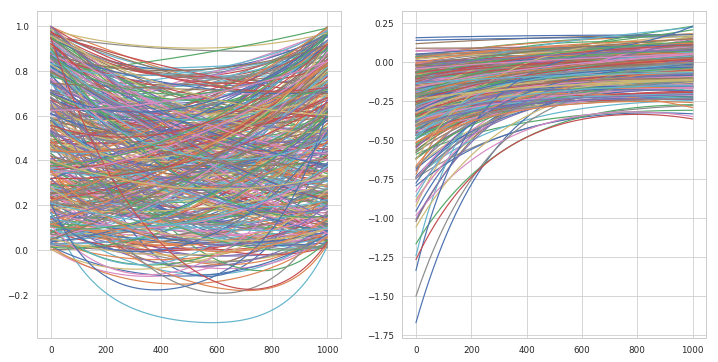

In [12]:
fig,ax = plt.subplots(1,2, figsize=(12,6))
ax[0].plot(m_x)
ax[1].plot(m_u)
plt.show()

## Optimal Energy

In [13]:
o_x, o_u, n_err = optimal_energy(A,T,B,x0,xf,rho,S)
n_err

3.2169780770295014e-12

/Users/stiso/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Public Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


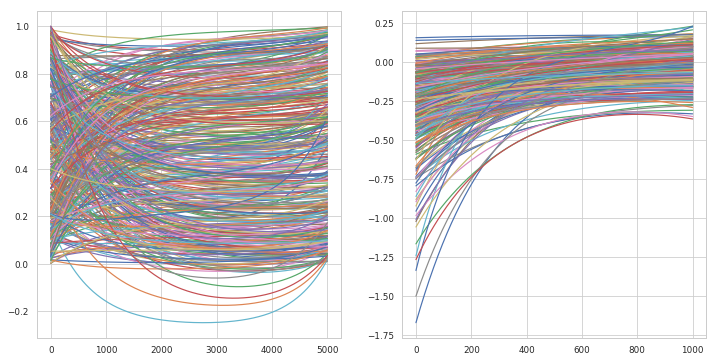

In [16]:
fig,ax = plt.subplots(1,2, figsize=(12,6))
ax[0].plot(o_x)
ax[1].plot(m_u)
plt.show()

### Minimum vs Optimal Energy

/Users/stiso/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Public Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


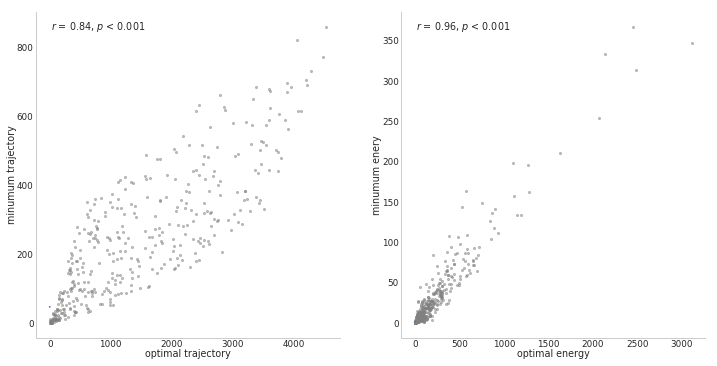

In [28]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))
reg_plot(x=np.sum(o_x**2,0), y=np.sum(m_x**2,0), xlabel='optimal trajectory', ylabel='minumum trajectory', ax=ax[0])
reg_plot(x=np.sum(o_u**2,0), y=np.sum(m_u**2,0), xlabel='optimal energy', ylabel='minumum enery', ax=ax[1])
plt.show()

## Simulate State Equation

In [7]:
U = np.random.rand(n,1,100)
x = sim_state_eq( A, B, x0, U)

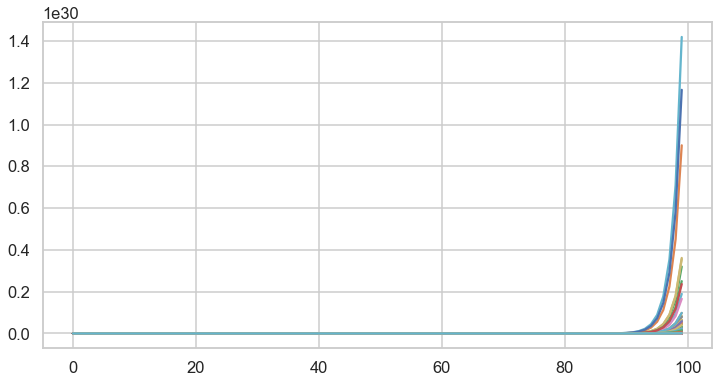

In [8]:
fig,ax = plt.subplots(1,1, figsize=(12,6))
ax.plot(np.squeeze(x.T))
plt.show()